In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

ImportError: No module named 'fastai'

In [3]:
! which python

/home/ubuntu/anaconda3/bin/python


In [6]:
import sys
sys.executable

'/usr/bin/python3'

In [5]:
folder = 'apples'
file = 'url_apples.txt'

In [ ]:
folder = 'oranges'
file = 'url_oranges.txt'

In [6]:
path = Path('data/fruit')
dest = path/folder
# dest.mkdir(parents=True, exist_ok=True)

In [7]:
classes = ['apples', 'oranges']

In [ ]:
# download_images(path/file, dest, max_pics=200)

In [8]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

apples


oranges


In [9]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [10]:
data.classes

['apples', 'oranges']

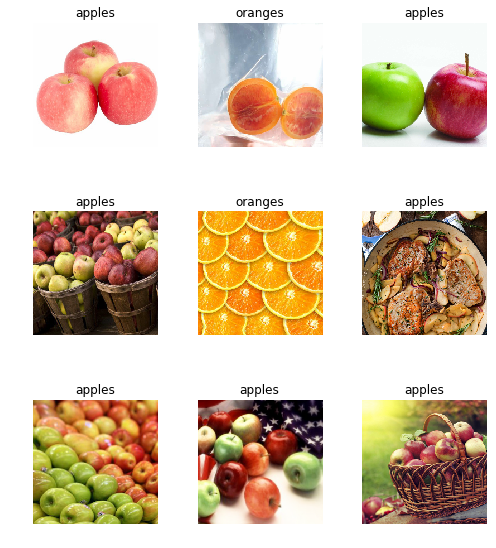

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apples', 'oranges'], 2, 305, 76)

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)